In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset 1

In [2]:
profilesdk = pd.read_excel('input/rawinputdata.xlsx', 
                         sheetname='profileDK',
                         encoding='UTF8',
                         thousands=',',
                         decimals='.',
                         index_col=[0])

In [17]:
gardening.index[1:]

Index([             'Time', 2012-01-01 00:00:00, 2012-01-01 01:00:00,
       2012-01-01 02:00:00, 2012-01-01 03:00:00, 2012-01-01 04:00:00,
       2012-01-01 05:00:00, 2012-01-01 06:00:00, 2012-01-01 07:00:00,
       2012-01-01 08:00:00,
       ...
       2012-12-31 14:00:00, 2012-12-31 15:00:00, 2012-12-31 16:00:00,
       2012-12-31 17:00:00, 2012-12-31 18:00:00, 2012-12-31 19:00:00,
       2012-12-31 20:00:00, 2012-12-31 21:00:00, 2012-12-31 22:00:00,
       2012-12-31 23:00:00],
      dtype='object', length=8785)

In [129]:
agri_cols = [item for item in profilesdk.columns if item.startswith("Agri")]
agri_cols.append("Gardening")
agri_cols

['Agriculture: Without electric heating',
 'Agriculture: With electric heating',
 'Agriculture: Irrigation plant',
 'Gardening']

In [123]:
gardening = profilesdk.loc[gardening.index[1:], "Gardening"]
agriwh = profilesdk.loc[profilesdk.index[1:], agri_cols[0]]
agri = profilesdk.loc[profilesdk.index[1:], agri_cols[1]]
agriwp = profilesdk.loc[profilesdk.index[1:], agri_cols[2]]

In [119]:
profilesdk.head()

Appartments in multifamilyhouses: Without electric heating  \
Time                                                        111.000000            
2012-01-01 00:00:00                                           0.000100            
2012-01-01 01:00:00                                           0.000100            
2012-01-01 02:00:00                                           0.000088            
2012-01-01 03:00:00                                           0.000078            

                     Appartments in multifamilyhouses: Joint consumption  \
Time                                                        119.000000     
2012-01-01 00:00:00                                           0.000107     
2012-01-01 01:00:00                                           0.000107     
2012-01-01 02:00:00                                           0.000100     
2012-01-01 03:00:00                                           0.000093     

                     One- and twofamilyhouses: Without electric heating  \
Time                                                        121.000000    
2012-01-01 00:00:00                                           0.000145    
2012-01-01 01:00:00                                           0.000145    
2012-01-01 02:00:00                                           0.000122    
2012-01-01 03:00:00                                           0.000101    

                     One- and twofamilyhouses: With electric heating  \
Time                                                      122.000000   
2012-01-01 00:00:00                                         0.000157   
2012-01-01 01:00:00                                         0.000157   
2012-01-01 02:00:00                                         0.000147   
2012-01-01 03:00:00                                         0.000132   

                     One- and twofamilyhouses: Weekend cottages  \
Time                                                 130.000000   
2012-01-01 00:00:00                                    0.000145   
2012-01-01 01:00:00                                    0.000145   
2012-01-01 02:00:00                                    0.000137   
2012-01-01 03:00:00                                    0.000134   

                     Agriculture: Without electric heating  \
Time                                            211.000000   
2012-01-01 00:00:00                               0.000084   
2012-01-01 01:00:00                               0.000084   
2012-01-01 02:00:00                               0.000084   
2012-01-01 03:00:00                               0.000085   

                     Agriculture: With electric heating  \
Time                                         212.000000   
2012-01-01 00:00:00                            0.000121   
2012-01-01 01:00:00                            0.000121   
2012-01-01 02:00:00                            0.000118   
2012-01-01 03:00:00                            0.000118   

                     Agriculture: Irrigation plant   Gardening  \
Time                                    215.000000  220.000000   
2012-01-01 00:00:00                       0.000013    0.000114   
2012-01-01 01:00:00                       0.000013    0.000114   
2012-01-01 02:00:00                       0.000013    0.000160   
2012-01-01 03:00:00                       0.000013    0.000162   

                     Manufacturing industries: Food, beverages and tobacco  \
Time                                                        310.000000       
2012-01-01 00:00:00                                           0.000045       
2012-01-01 01:00:00                                           0.000045       
2012-01-01 02:00:00                                           0.000046       
2012-01-01 03:00:00                                           0.000047       

                                          ...                         \
Time                                      ...                          
2012-01-01 00:00:00                     

In [9]:
# Relative profile of consumption: % MwH

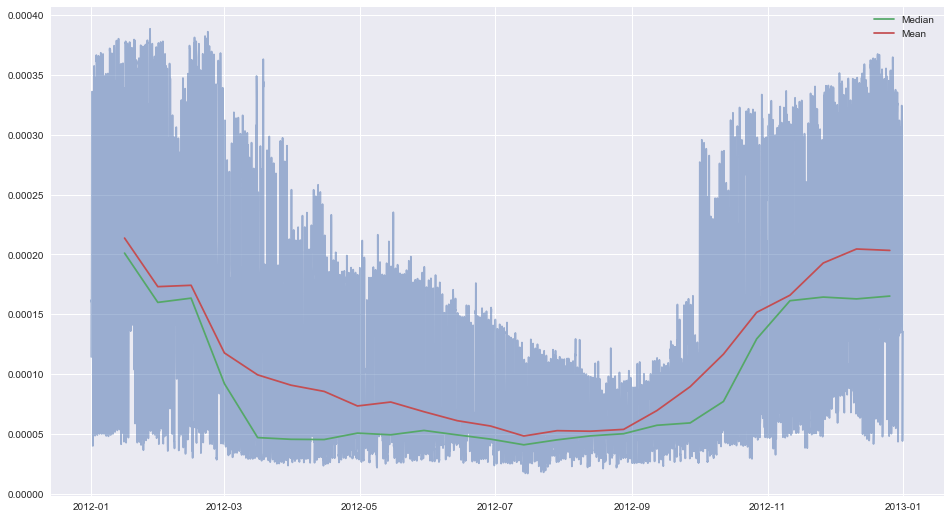

In [146]:
plt.figure(figsize=(16, 9))
plt.plot(gardening.index, gardening.values, alpha=0.5)
plt.plot(gardening.resample("15D").median().index[1:], gardening.resample("15D").median().values[1:],
        label="Median")
plt.plot(gardening.resample("15D").mean().index[1:], gardening.resample("15D").mean().values[1:],
         label="Mean")
plt.legend()
plt.show()

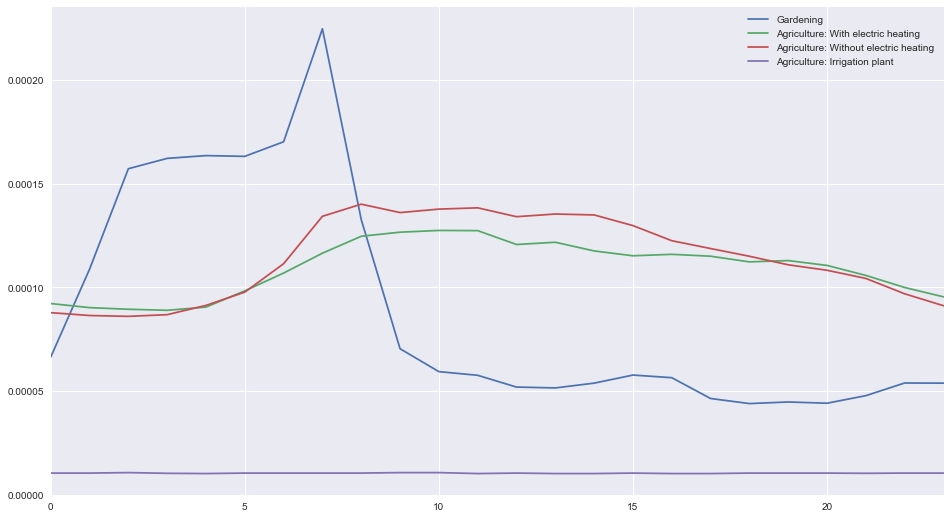

In [126]:
plt.figure(figsize=(16, 9))
gardening.groupby([gardening.index.hour]).median().plot()
agri.groupby([agri.index.hour]).median().plot()
agriwh.groupby([agriwh.index.hour]).median().plot()
agriwp.groupby([agriwp.index.hour]).median().plot()
plt.legend()
#for date in set(gardening.index.date):
#    ds = gardening[gardening.index.date == date].resample("1H").mean()
#    plt.plot(ds.index, ds.values, alpha=0.15)
plt.show()

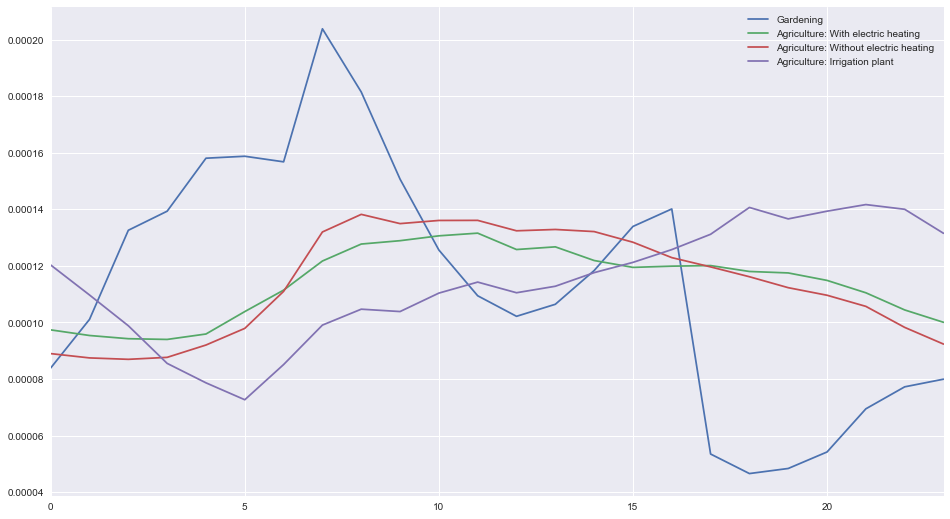

In [125]:
plt.figure(figsize=(16, 9))
gardening.groupby([gardening.index.hour]).mean().plot()
agri.groupby([agri.index.hour]).mean().plot()
agriwh.groupby([agriwh.index.hour]).mean().plot()
agriwp.groupby([agriwp.index.hour]).mean().plot()
plt.legend()
#for date in set(gardening.index.date):
#    ds = gardening[gardening.index.date == date].resample("1H").mean()
#    plt.plot(ds.index, ds.values, alpha=0.15)
plt.show()

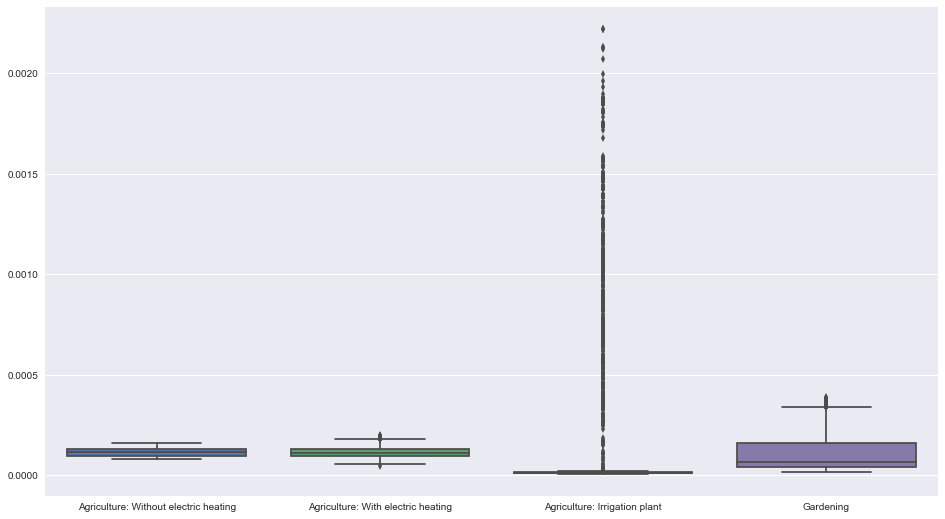

In [137]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=profilesdk.iloc[1:,].loc[:, agri_cols])
plt.show()

# Dataset 2

In [83]:
d2 = pd.read_excel('input/VMAS_summarized.xlsx', 
                     sheetname='Sheet1',
                     encoding='UTF8',
                     thousands=',',
                     decimals='.',
                     header = 0)

In [148]:
d2["Agg End-use"].unique()

array(['01 Medium temp. heat', '02 High temp. heat', '03 Haullage',
       '06 Heating', '04 Light and electronics', '05 Electric motors'], dtype=object)

In [84]:
mycat = [item for item in d2["Agg Fuel"].unique() if item.endswith("city")][0]

In [112]:
mask = d2["Agg Fuel"].values == mycat
d2mask = d2[mask]
d2agri = d2mask.groupby(["Industry", "End-use"]).Value.mean().loc[list(d2.Industry.unique()[:5])].reset_index()

In [114]:
d2agri

Industry                                     End-use  \
0          01 Agriculture            01 Boiler and distribution loses   
1          01 Agriculture                          02 Heating/boiling   
2          01 Agriculture                                   03 Drying   
3          01 Agriculture                               04 Dewatering   
4          01 Agriculture                              05 Destilation   
5          01 Agriculture                       06 Firering/Sintering   
6          01 Agriculture                          07 Melting/Casting   
7          01 Agriculture           08 Other process heat up to 150 C   
8          01 Agriculture           09 Other process heat above 150 C   
9          01 Agriculture                                 10 Haullage   
10         01 Agriculture                                11 Transport   
11         01 Agriculture                         12 Spatial heating    
12         01 Agriculture            13 Energy consumed by heat pumps   
13         01 Agriculture                                 14 Lighting   
14         01 Agriculture                                  15 Pumping   
15         01 Agriculture                          16 Spatial cooling   
16         01 Agriculture  17 Cooling/freezing (excl spatial cooling)   
17         01 Agriculture                      18 Spatial ventilation   
18         01 Agriculture                         19 Ventilation/fans   
19         01 Agriculture             20 Compressed air (pneumatics?)   
20         01 Agriculture                               21 Hydraulics   
21         01 Agriculture                    22 Other electric motors   
22         01 Agriculture                 23 IT and other electronics   
23         01 Agriculture                       24 Other electric use   
24        02 Horticulture            01 Boiler and distribution loses   
25        02 Horticulture                          02 Heating/boiling   
26        02 Horticulture                                   03 Drying   
27        02 Horticulture                               04 Dewatering   
28        02 Horticulture                              05 Destilation   
29        02 Horticulture                       06 Firering/Sintering   
..                    ...                                         ...   
90   04 Forestry (020000)                         19 Ventilation/fans   
91   04 Forestry (020000)             20 Compressed air (pneumatics?)   
92   04 Forestry (020000)                               21 Hydraulics   
93   04 Forestry (020000)                    22 Other electric motors   
94   04 Forestry (020000)                 23 IT and other electronics   
95   04 Forestry (020000)                       24 Other electric use   
96    05 Fishing (030000)            01 Boiler and distribution loses   
97    05 Fishing (030000)                          02 Heating/boiling   
98    05 Fishing (030000)                                   03 Drying   
99    05 Fishing (030000)                               04 Dewatering   
100   05 Fishing (030000)                              05 Destilation   
101   05 Fishing (030000)                       06 Firering/Sintering   
102   05 Fishing (030000)                          07 Melting/Casting   
103   05 Fishing (030000)           08 Other process heat up to 150 C   
104   05 Fishing (030000)           09 Other process heat above 150 C   
105   05 Fishing (030000)                                 10 Haullage   
106   05 Fishing (030000)                                11 Transport   
107   05 Fishing (030000)                         12 Spatial heating    
108   05 Fishing (030000)            13 Energy consumed by heat pumps   
109   05 Fishing (030000)                                 14 Lighting   
110   05 Fishing (030000)                                  15 Pumping   
111   05 Fishing (030000)                          16 Spatial cooling   
112   05 Fishing (030000)  17 Cooling/freezing (excl spatial cooling)   
11

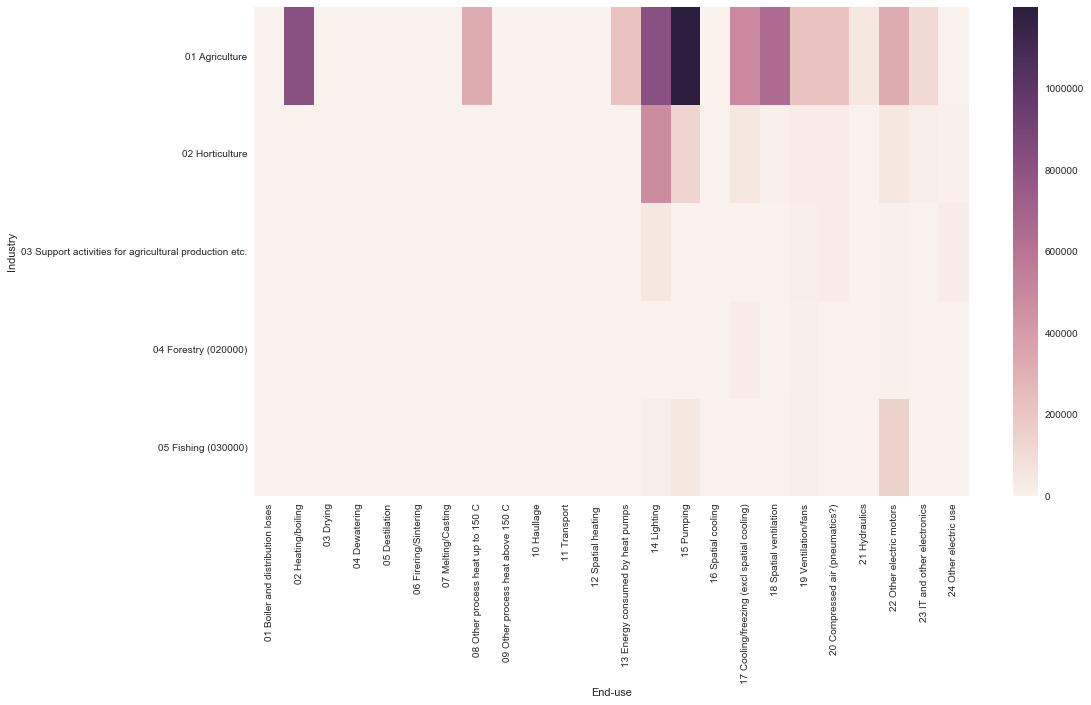

In [117]:
plt.figure(figsize=(16, 9))
sns.heatmap(d2agri.pivot("Industry", "End-use", "Value"))
plt.show()

# Dataset 3

In [118]:
d2.Industry.unique()[:5]

array(['01 Agriculture', '02 Horticulture',
       '03 Support activities for agricultural production etc.',
       '04 Forestry (020000)', '05 Fishing (030000)'], dtype=object)

Underlying assumption is that the 5 industries above can be explained by the profile explained at the top. The only way to prove this is to figure out the energy use cases from dataset 2 are somehow similar to the profile described in 1 in ways other than assumption. How is that possible?

Explaining the dataset 2 based on dataset 1 is a futile maneouver because it is an hourly consumption profile that wouldn't match the overall consumption since it is given as a relative-%-consumption-MwH but relative to the maximum at that hour? Maybe not. The question is however, how can we assume that the agriculture can be explained by a single curve?